<a href="https://colab.research.google.com/github/Kwhite2020/FAU/blob/main/Predictive_analysis_in_cardiovascular_medecine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Exploratory Data Analysis (EDA)**

1.1 Perform a thorough EDA to understand the dataset, including summary statistics, missing values, and feature distributions

In [ ]:
# Import necssary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("heart_failure_clinical_records_with_severity.csv")

# Display Basic info
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  Severity  
0        0     4            1       6.6  
1        0     6    

1.2 Visualize Dataset using histograms, boxplots, and correlation heatmaps to identify patterns and relationships between features

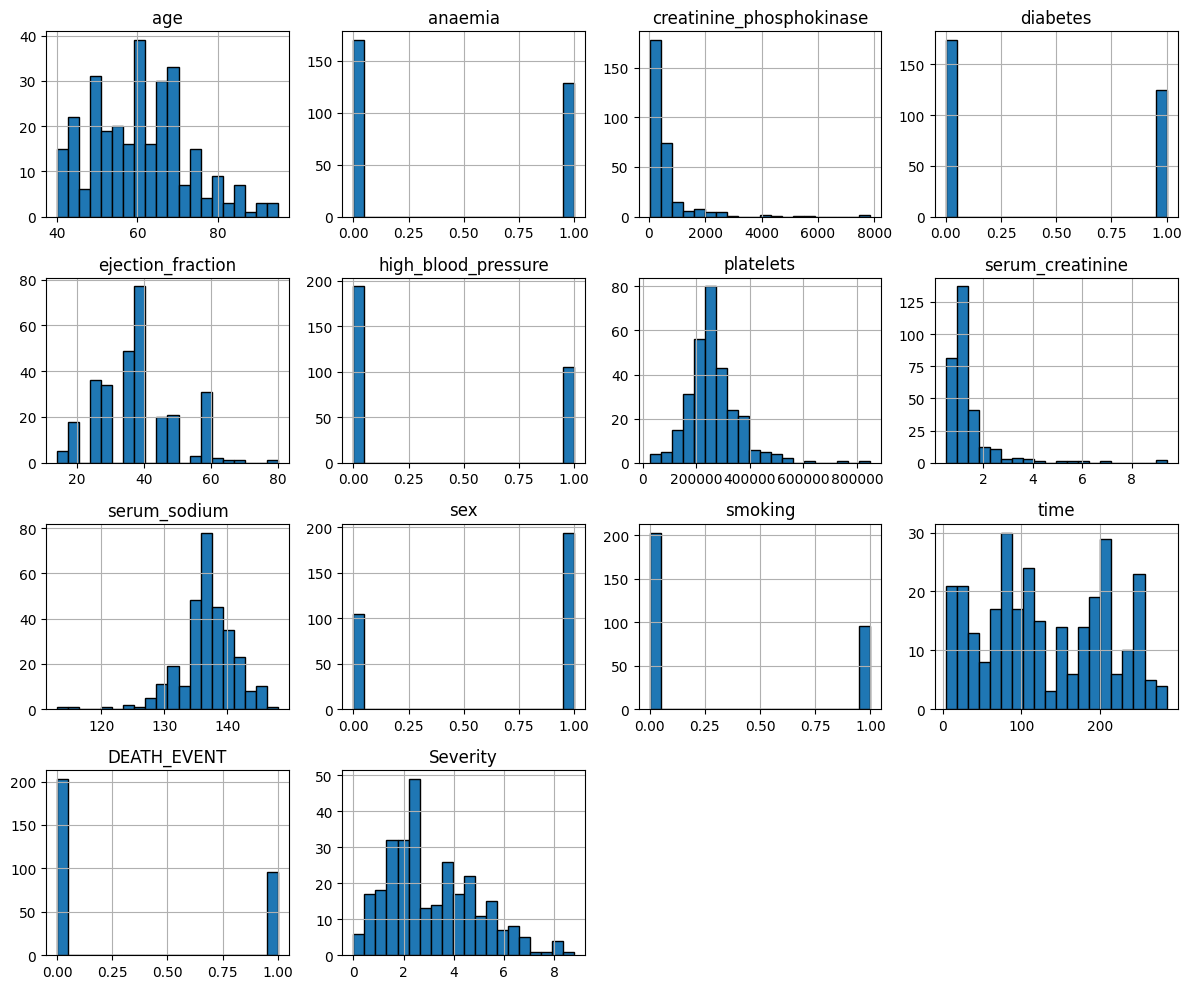

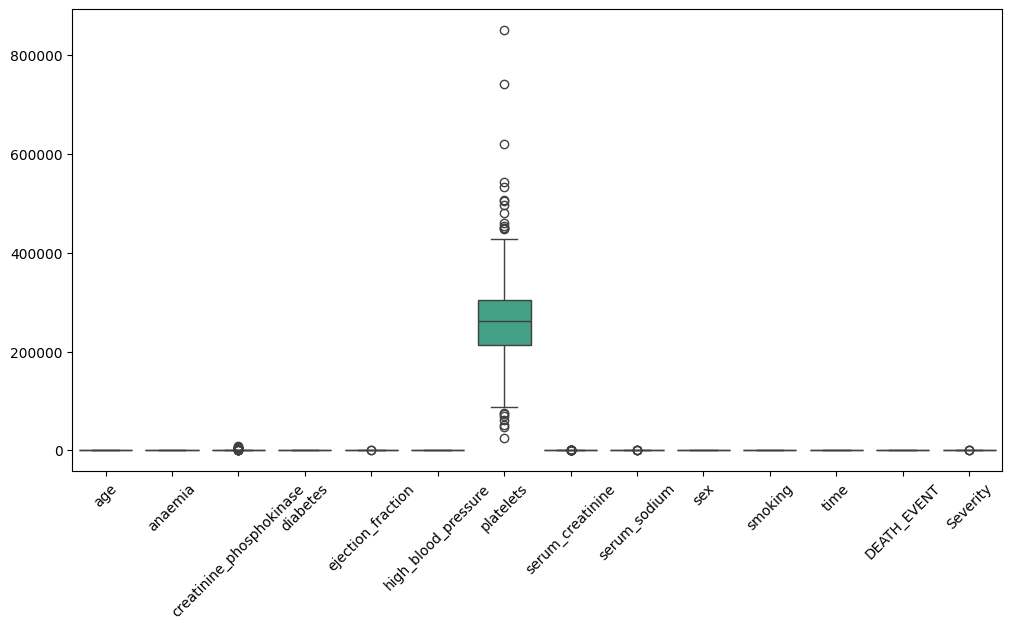

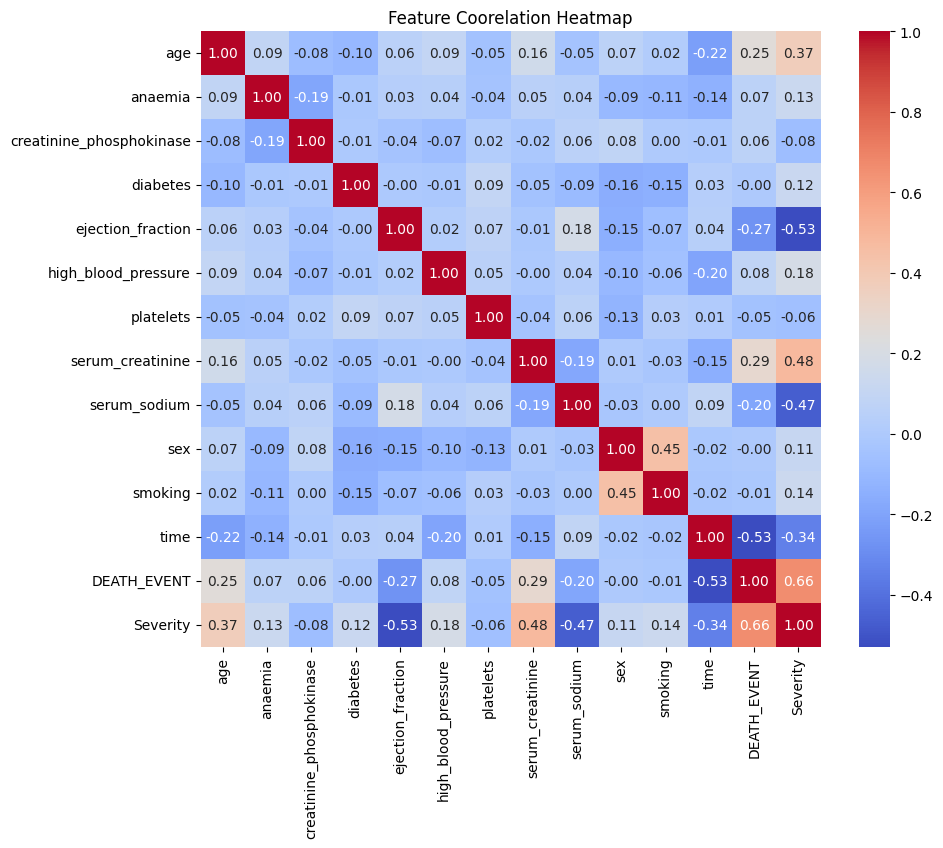

In [ ]:
# Histograms for feature distributions
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

# Corelation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt= ".2f")
plt.title("Feature Coorelation Heatmap")
plt.show()


1.3 Generate pairplots to analyze feature interactions and their impact on 'DEATH_EVENT'.

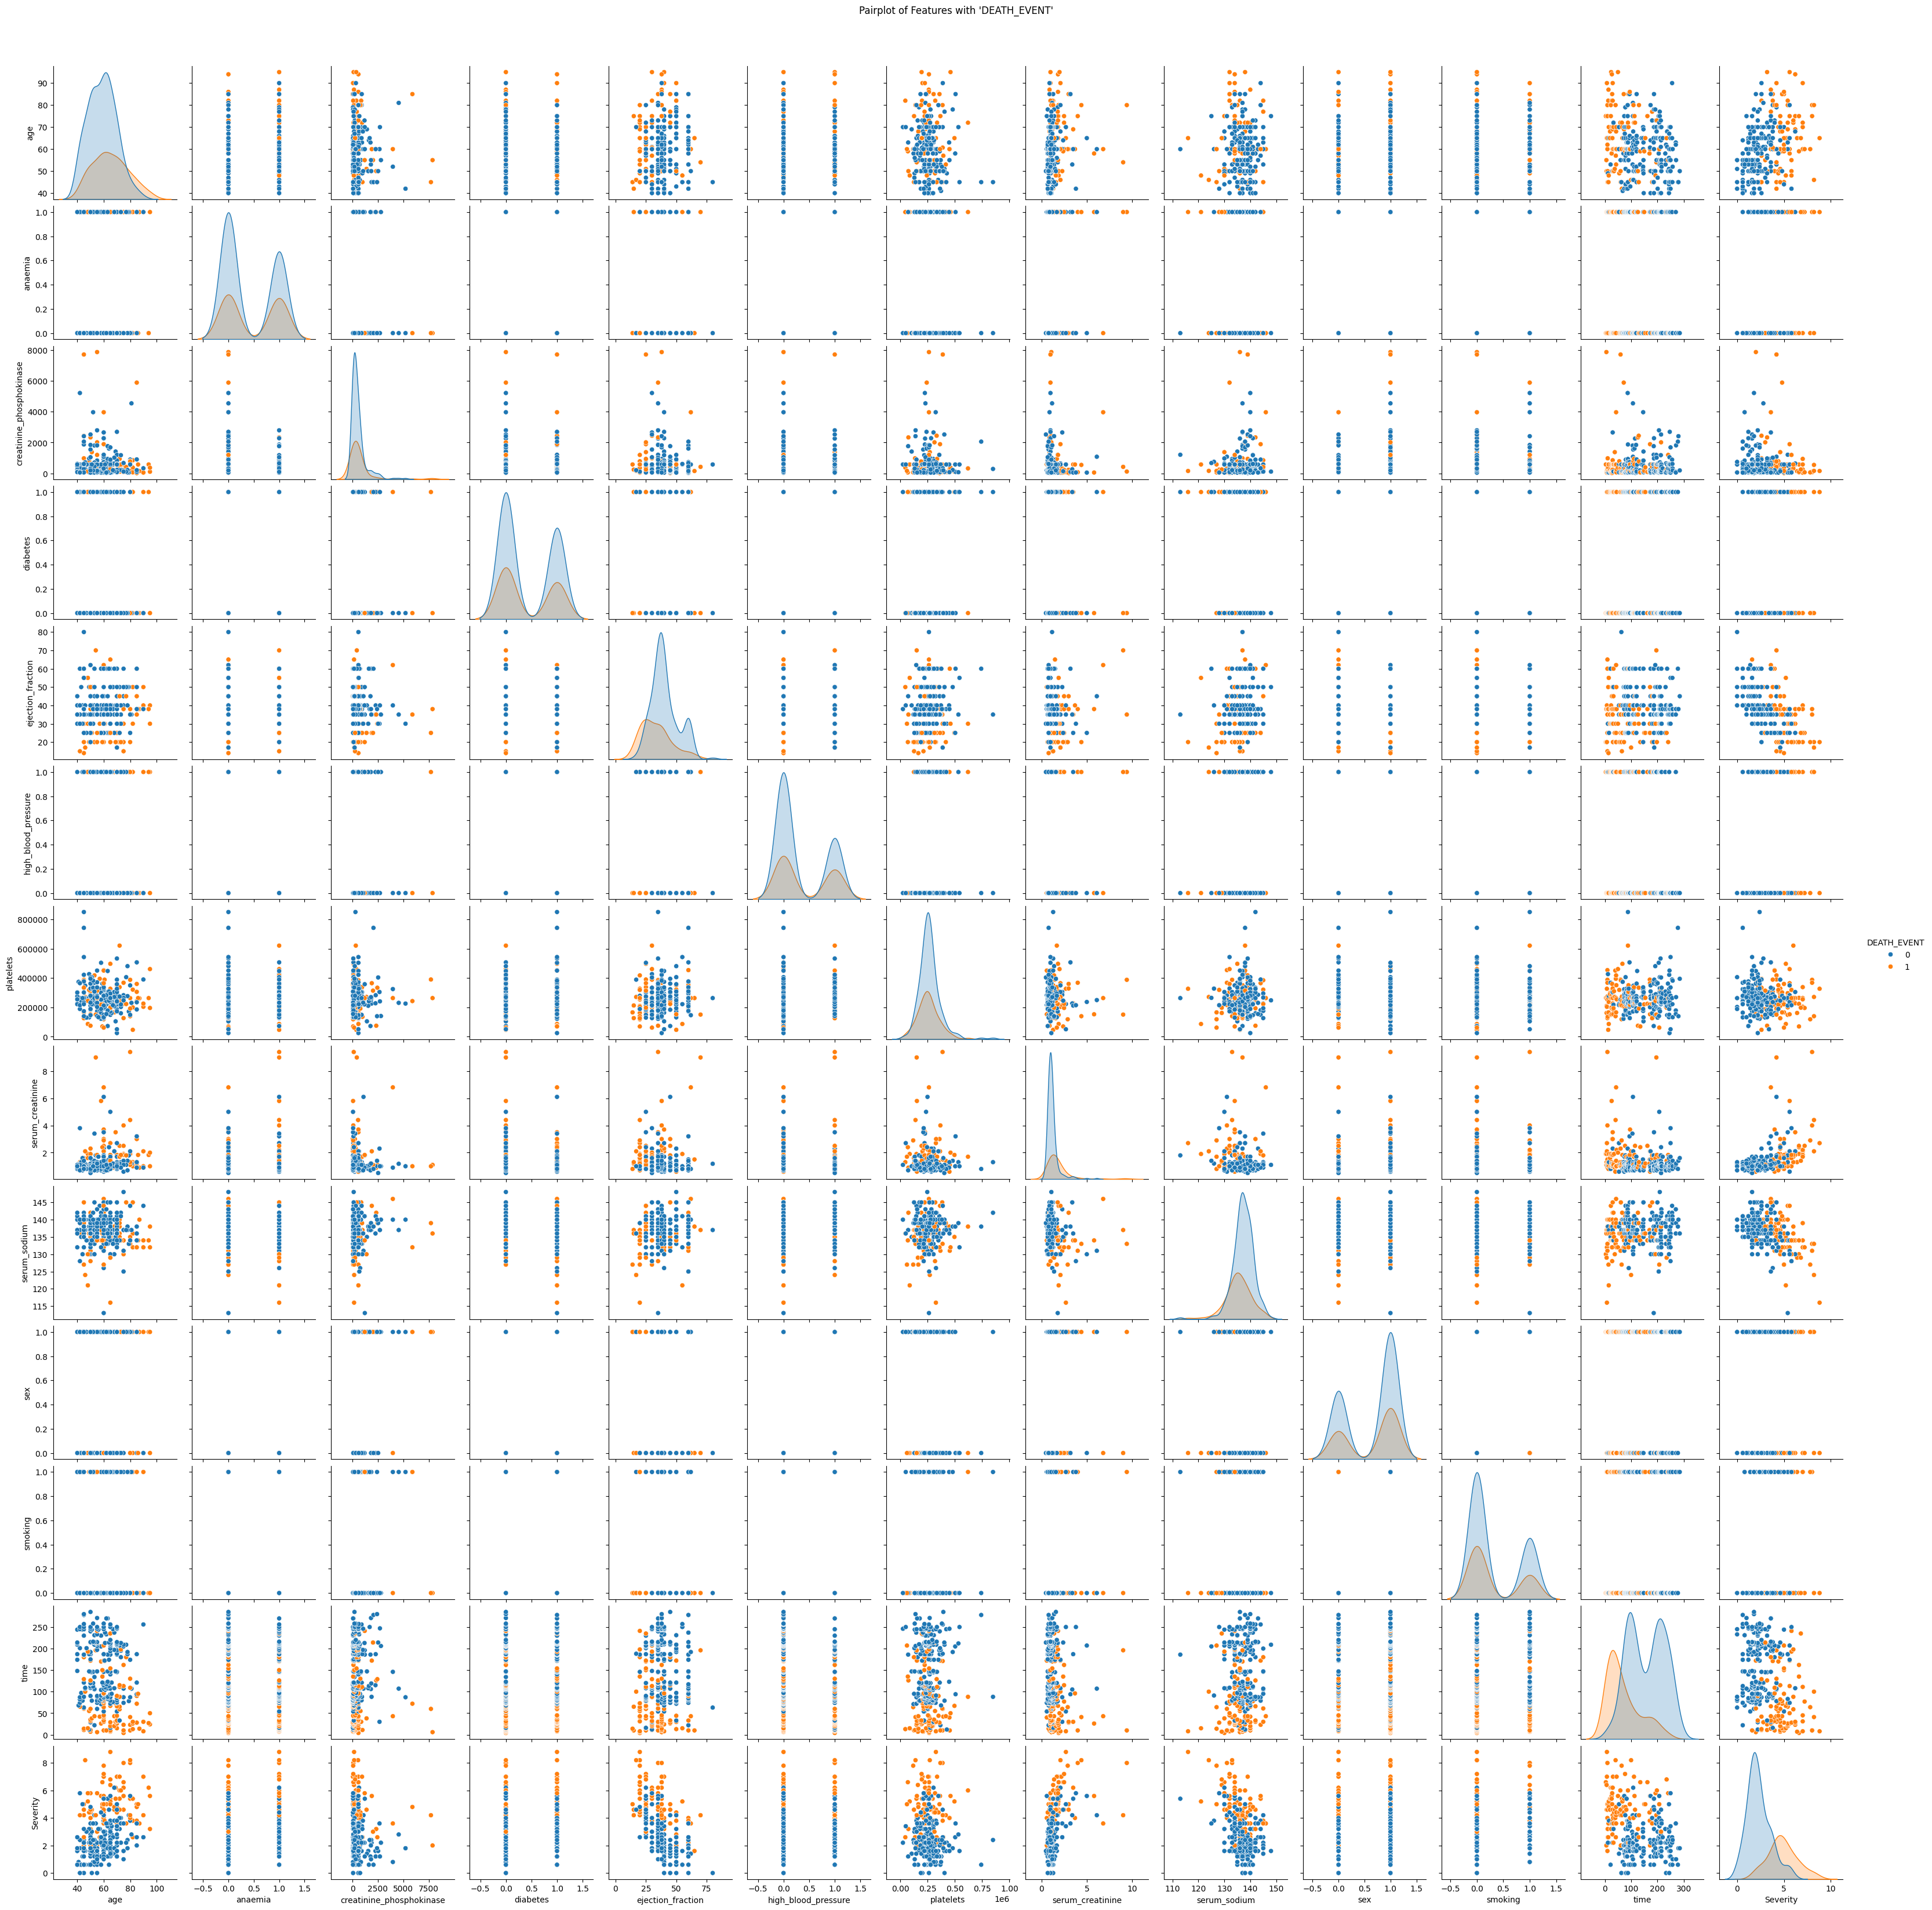

In [ ]:
#Pairplot to analyze interactions and impact on 'DEATH_EVENT'
sns.pairplot(df, hue='DEATH_EVENT', diag_kind='kde')
plt.suptitle("Pairplot of Features with 'DEATH_EVENT'", y=1.02)
plt.show()

**Task 2: Regression Analysis**

2.1 Split the dataset into training and testing sets

In [ ]:
# Split dataset into traininf and testing sets

# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop 'DEATH_EVENT" Feature
df_reg = df.drop(columns=["DEATH_EVENT"])
X_reg = df_reg[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]
y_reg = df["DEATH_EVENT"]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("X_train shape:", X_train_reg.shape)
print("X_test shape:", X_test_reg.shape)

print("y_train shape:", y_train_reg.shape)
print("y_test shape:", y_test_reg.shape)

X_train shape: (239, 7)
X_test shape: (60, 7)
y_train shape: (239,)
y_test shape: (60,)


2.2 Perform Linear Regression using relevent clinical features to predict Severity (ignoring 'DEATH_EVENT")

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Import mean_squared_error and r2 score
from sklearn.metrics import mean_squared_error, r2_score

# Sort relevent features and apply to training and testing sets
X = df[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]
y = df["Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test set
y_pred_linear_reg = model.predict(X_test)

# Evaluate the model
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

# Print results
print("Mean Squared Error (Linear Regression):", mse_linear_reg)
print("R-squared (Linear Regression):", r2_linear_reg)

Mean Squared Error (Linear Regression): 0.9684271091808029
R-squared (Linear Regression): 0.6930727439552903


2.3 Implement Ridge Regression using the same features

In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge

# Perform Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions on test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print("Mean Squared Error (Ridge):", mse_ridge)
print("R-squared (Ridge):", r2_ridge)

Mean Squared Error (Ridge): 0.9674798283138787
R-squared (Ridge): 0.6933729692530255


2.4 Implement Lasso Regression using the same features and identify which features are important

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Perform Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predictions on test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print("Mean Squared Error (Lasso):", mse_lasso)
print("R-squared (Lasso):", r2_lasso)

# Identify which features are important from Lasso Regression
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)
print("\nLasso Regression Important Feautres:")
print(lasso_coefficients)

Mean Squared Error (Lasso): 1.2975789302097407
R-squared (Lasso): 0.5887534159513589

Lasso Regression Important Feautres:
age                         4.037849e-02
creatinine_phosphokinase   -1.262155e-04
ejection_fraction          -6.597104e-02
platelets                  -2.494896e-07
serum_creatinine            0.000000e+00
serum_sodium               -1.077621e-01
time                       -5.018589e-03
dtype: float64


2.5 Extent the analysis by applying Kernel Regression with different types of kernels (e.g., linear, polynomial, radial bias function)

In [ ]:
# Import KernelRidge
from sklearn.kernel_ridge import KernelRidge

# Perform Kernel Ridge Regression
kernels = ["linear", "polynomial", "rbf", "sigmoid"]
for kernel in kernels:
    kernel_model = KernelRidge(kernel=kernel)
    kernel_model.fit(X_train, y_train)

    # Predictions on test set
    y_pred_kernel = kernel_model.predict(X_test)

    # Evaluate the model
    mse_kernel = mean_squared_error(y_test, y_pred_kernel)
    r2_kernel = r2_score(y_test, y_pred_kernel)

    # Print the results
    print(f"\nMean Squared Error ({kernel} Kernel):", mse_kernel)
    print(f"R-squared ({kernel} Kernel):", r2_kernel)

# Explanation of Kernel Selection
print("\nKernel Selection Explanation:")
print("- Linear Kernel: Useful for problems where features have a linear relationship with the target variable.")
print("- Polynomial Kernel: Captures non-linear relationships by introducing polynomial feature interactions.")
print("- RBF (Radial Basis Function) Kernel: Effective when data has complex, non-linear relationships. Useful for capturing localized patterns.")
print("- Sigmoid Kernel: Can model probabilistic outputs.")


Mean Squared Error (linear Kernel): 1.1997520530934032
R-squared (linear Kernel): 0.6197580570607341

Mean Squared Error (polynomial Kernel): 3.2707163360252745
R-squared (polynomial Kernel): -0.0366004635764734

Mean Squared Error (rbf Kernel): 13.979333333331974
R-squared (rbf Kernel): -3.4305228350777996

Mean Squared Error (sigmoid Kernel): 3.213234027777768
R-squared (sigmoid Kernel): -0.01838237883445548

Kernel Selection Explanation:
- Linear Kernel: Useful for problems where features have a linear relationship with the target variable.
- Polynomial Kernel: Captures non-linear relationships by introducing polynomial feature interactions.
- RBF (Radial Basis Function) Kernel: Effective when data has complex, non-linear relationships. Useful for capturing localized patterns.
- Sigmoid Kernel: Can model probabilistic outputs.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


2.6 Evaluate the perforamnce of all regression mdoels using appropriate metrics (e.g., Mean Sqaured Errror, R-squared)


Model Evaluation Results:
                            Model       MSE       R^2
0               Linear Regression  0.968427  0.693073
1                Ridge Regression  0.967480  0.693373
2                Lasso Regression  1.297579  0.588753
3      Kernel Regression (Linear)  3.213234 -0.018382
4  Kernel Regression (Polynomial)  3.213234 -0.018382
5         Kernel Regression (RBF)  3.213234 -0.018382
6     Kernel Regression (Sigmoid)  3.213234 -0.018382


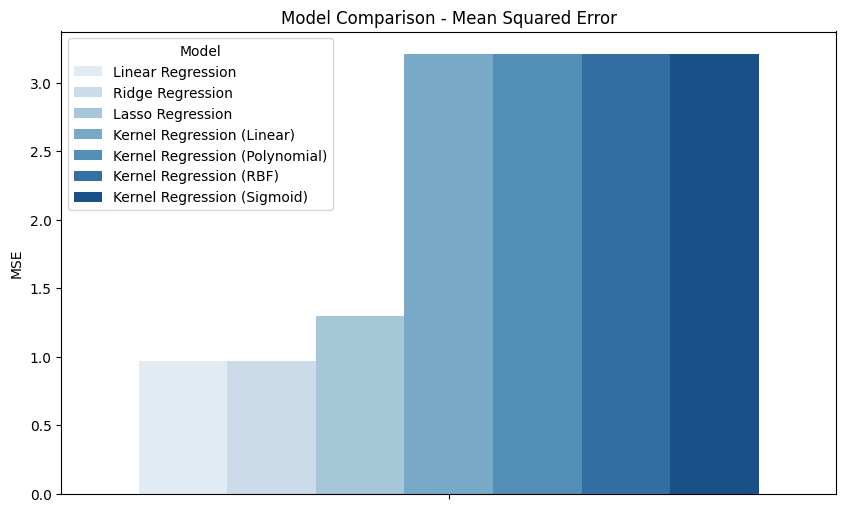

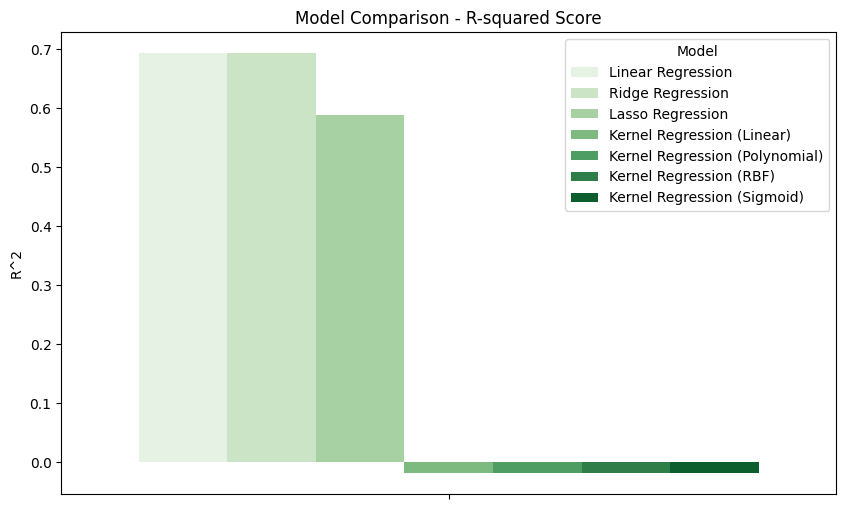

In [ ]:
# Evaluate models
models = {
    "Linear Regression": y_pred_linear_reg,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Kernel Regression (Linear)": y_pred_kernel,
    "Kernel Regression (Polynomial)": y_pred_kernel,
    "Kernel Regression (RBF)": y_pred_kernel,
    "Kernel Regression (Sigmoid)": y_pred_kernel
}

results = []

for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R^2": r2})

results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:")
print(results_df)

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(hue="Model", y="MSE", data=results_df, palette="Blues", legend=True)
plt.xticks(rotation=45)
plt.title("Model Comparison - Mean Squared Error")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(hue="Model", y="R^2", data=results_df, palette="Greens", legend=True)
plt.xticks(rotation=45)
plt.title("Model Comparison - R-squared Score")
plt.show()

2.7 Discuss the strenghts and weaknessess of the  Lienar, Ridge, and Kernel Regression models for predicting Severity

Based on my results Linear and Ridge Regression perform best, having the lowest mse (0.97) and r2 (0.69) values. Although, Ridge does slightly outperform Linear, potentially due to its ability to handle multicollinearity.

Lasso Regression performs worse having a mse of 1.29 and a lwoer r^2 of 0.58. This suggests that some important features may have been reduced too aggresivley due to Lasso's feature selection process.

Kernel Regression performs poorly, outputing a mse of 3.21 and r2 of (-0.018) across all kernels. A negative r2 means the model performs worse than simply predicting the mean of Severity. Kernel regression does not seem to be well suited for this dataset.

**Task 3: Classification Analysis**

3.1 train a Logisitc Regression model using relevent clinical features to predct 'DEATH_EVENT' (ignoring Severity)

In [ ]:
# Import Standard Scalar preprocessor and LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Sort relevent clinical features
X_clf = df[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]]
y_clf = df["DEATH_EVENT"]

# Split data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clf)
X_test_scaled = scaler.transform(X_test_clf)

# Train Logisitc Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train_clf)

# Make predictions
y_red_log_reg = log_reg_model.predict(X_test_clf)
y_red_log_reg_proba = log_reg_model.predict_proba(X_test_clf)[:, 1]

# Evaluate the model
mse_log_reg = mean_squared_error(y_test_clf, y_red_log_reg)
r2_log_reg = r2_score(y_test_clf, y_red_log_reg)

# Print results
print("Mean Squared Error (Logistic Regression):", mse_log_reg)
print("R-squared (Logistic Regression):", r2_log_reg)

# Store model
models = {
    "Logistic Regression": log_reg_model
}


Mean Squared Error (Logistic Regression): 0.4166666666666667
R-squared (Logistic Regression): -0.7142857142857144


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


3.2 Compare the performance of Logisitic Regression with other classifiers such as Support Vector Machine (SVM), Fandom Forest, and Naieve Bayes.

In [ ]:
# Import SVC, RandomForestClassifer, and GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize classifiers
models = {
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naïve Bayes": GaussianNB()
}

# Dictionary to store trained models
trained_models = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train) # Train the model
    y_pred = model.predict(X_test) # Predictions
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"\nModel: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Store models
    trained_models[name] = model


Model: Support Vector Machine
Mean Squared Error: 0.4166666666666667
R-squared: -0.7142857142857144

Model: Random Forest
Mean Squared Error: 0.3
R-squared: -0.23428571428571443

Model: Naïve Bayes
Mean Squared Error: 0.26666666666666666
R-squared: -0.0971428571428572


3.3 Evaluate classification models using accuracy, precision, and recall

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model Performance Comparison:
                         Accuracy  Precision  Recall  F1 Score   ROC-AUC
Logistic Regression     0.583333   0.000000    0.00  0.000000  0.500000
Support Vector Machine  0.583333   0.000000    0.00  0.000000  0.467429
Random Forest           0.700000   0.705882    0.48  0.571429  0.844000
Naïve Bayes             0.733333   0.909091    0.40  0.555556  0.840000


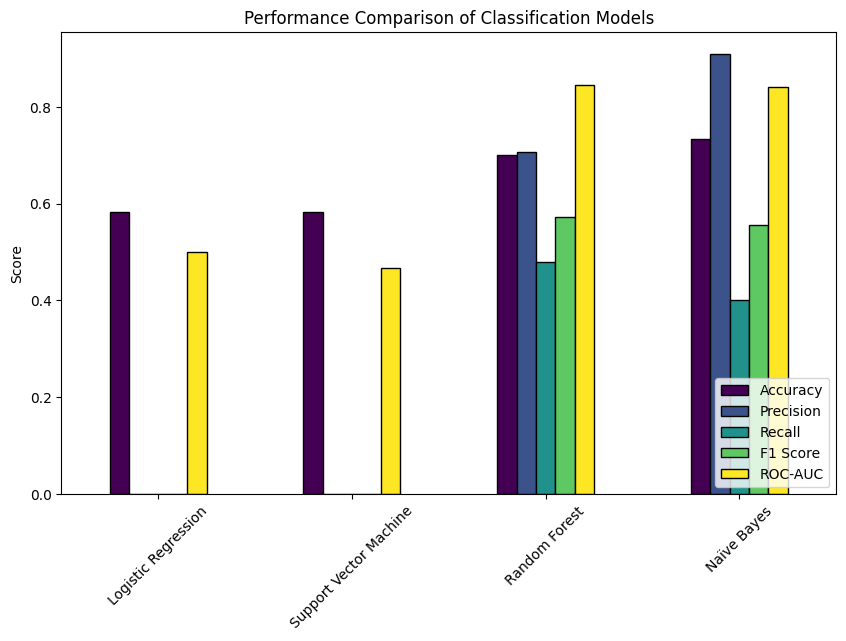

In [ ]:
# Import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, and confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Evaluate Results
models = {
    "Logistic Regression": log_reg_model,  # Use the trained logistic regression model
    "Support Vector Machine": trained_models["Support Vector Machine"],
    "Random Forest": trained_models["Random Forest"],
    "Naïve Bayes": trained_models["Naïve Bayes"]
}

# Dictionary to store performance metrics
results = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)  # Get predictions
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Probabilities if available

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

    # Store results
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to a DataFrame
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]).T

# Print results
print("\nModel Performance Comparison:\n", metrics_df)

# Visualize results
metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")
plt.title("Performance Comparison of Classification Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

3.4 Discuss the effectivness of different classifiers in predicitng patient mortality.

Logisitc Regression performs poorly as indicated by zero percision, recall, and F1 score. This is likely due to the model struggling to distinguish between classes. Additionally the ROC-AUC of 0.5 suggests that the model did not perfrom well at predicting DEATH_EVENT.

Support Vector Mean model also fails to make any meaningful predictions, shown through it's zero score for percision, recall, and F1 score. It has a lower ROC-AUC score, meaning it is performing worse than random chance. The model could be further tuned through hyperparameter tuning or it may require a further kernel selection.

Random forest model performs significantly better than SVC and Logisitc Regression, having significantly better recall at 0.48 and percision at ~0.71. The ROC-AUC of 0.84 suggests a strong predictive capability. It superior performance can be contributed to its abilty to capture non-linear relationships and handle class imbalances.

Naïve Bayes model has the highest accuracy (0.73) and precision (0.91), however its lower recall score of 0.4 (campared to Random Forest's 0.48) suggests it performs worse at detecting the number of true posotives than Random Forest. The RUC-AUC score of 0.84 indicates a very strong performance and predictive ability.

The best performing model is the Random Forest model due to its balanced percision and reacall score with additioanlly having the highest ROC-AUC score. Even though Naïve Bayes has the best percision and accuracy, Random Forest's improved RUC-AUC and F1 score indicates it has a better ability to predict DEATH_EVENTS.